In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers 

In [2]:
def read_csv(file_path):
    # load from file
    df = pd.read_csv(file_path)
    # label columns as interger values - last col is the class ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
    df.columns = [i for i in range(1,len(df.columns)+1)]
    return df

In [108]:
df_train = read_csv('data/01_ecg_data/mitbih_train.csv')
df_train.head()

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# Check distribution of classes
# best ways to deal with the imbalance? simple reduction in samples to equal that of the lowest number eg 3.0
# interesting comparison between the sets though. would the reduction lead to an overall performance reduction?

counts = df[188].value_counts() 
classes = ['N', 'S', 'V', 'F', 'Q']
(counts/sum(counts))*100

188
0.0    82.760038
4.0     7.345484
2.0     6.614590
1.0     2.539857
3.0     0.740030
Name: count, dtype: float64

In [109]:
x_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

x_train.shape, y_train.shape

((87553, 187), (87553,))

In [110]:
# reshape and normalize to floats [0.0, 1.0]
# x_train = x_train.reshape(60000, 28*28)/255.0
# x_test = x_test.reshape(10000, 28*28)/255.0

y_train = keras.utils.to_categorical(y_train, num_classes=5)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print(x_train.shape, y_train.shape)

(87553, 187) (87553, 5)


Typical Examples of ECG Displays
https://www.hindawi.com/journals/isrn/2014/178436/fig1/

Table of Classes
https://www.hindawi.com/journals/isrn/2014/178436/tab1/

In [6]:
# samples at #Hz
df = read_csv('data/01_ecg_data/mitbih_test.csv')
df.tail()

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [91]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
count,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,...,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000,21891.000000
mean,0.894405,0.761902,0.426641,0.221606,0.201682,0.209897,0.204811,0.200999,0.197640,0.196030,...,0.004588,0.004328,0.004020,0.003789,0.003639,0.003459,0.003167,0.003000,0.002946,0.473711
std,0.234564,0.218664,0.228568,0.208710,0.177730,0.172195,0.177948,0.176143,0.170229,0.166707,...,0.043129,0.042188,0.040256,0.039398,0.038536,0.037718,0.035904,0.035523,0.035267,1.143469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.924254,0.683355,0.251220,0.050514,0.082873,0.087912,0.072678,0.066003,0.064516,0.068506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.990431,0.828996,0.432781,0.167641,0.147651,0.158120,0.144068,0.144509,0.150442,0.149038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.912320,0.583994,0.347097,0.259227,0.287356,0.298456,0.294566,0.289907,0.282966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991429,...,0.980392,1.000000,0.966102,1.000000,1.000000,1.000000,1.000000,0.996053,1.000000,4.000000


In [7]:
df[188].value_counts()

188
0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64

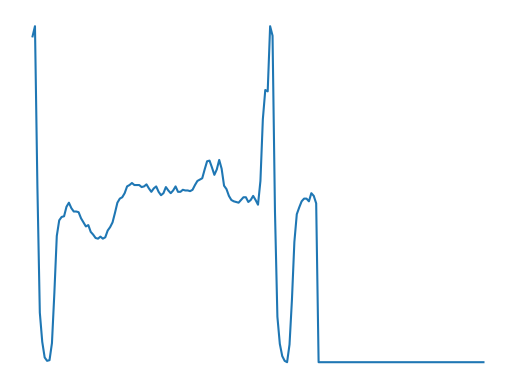

In [134]:
plt.plot(df.iloc[12][:-1])
plt.axis('off')
# plt.savefig('./data/01_ecg_data_png/train/test.png')
plt.show()

In [108]:
def create_pngs(file_path, data):
    l = len(data) - 1
    for index, row in data.iterrows():
        file_name = index
        plt.plot(row[:-1])
        plt.axis('off')
#         plt.savefig(f'{file_path}/{file_name}.png')
        plt.clf()

        display_status_pct(l, index)
#         for testing
#         if index >= 1000:
#             break
        

In [111]:
create_pngs('./data/01_ecg_data_png/test_data', df)

<Figure size 640x480 with 0 Axes>

In [75]:
len(df)

87553

In [104]:
def display_status_pct(file_len, index):
    '''
    show a running display of 0 to 100% of the file length in 1 pct intervals
    
    params:
        file_len (int): the length of file to be monitered
        index (the index of the file currently being processed)
    
    '''
    display_pct = int((index // (file_len / 100)))
    print(f'Processing: {display_pct}%', end ="\r")

In [117]:
model = keras.models.Sequential([
     # flatten the 1d vector first
    keras.layers.Flatten(input_shape=(187,)), 
#     keras.layers.Input(shape=inpx),
#     keras.layers.Conv2D(784, kernel_size=(3, 3), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(16, activation='relu'),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation="softmax")
])

In [118]:
# worse case for the outlier in terms of model training
model.compile(loss = keras.losses.CategoricalCrossentropy(),
              metrics = keras.metrics.Accuracy(),
              optimizer = keras.optimizers.legacy.RMSprop())

In [119]:
# callbacks=[cb], verbose=0
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=100)

Epoch 1/30
701/701 [==============================] - 1s 850us/step - loss: 0.0089 - accuracy: 0.1993 - val_loss: 62.8446 - val_accuracy: 0.2062
Epoch 2/30
701/701 [==============================] - 1s 817us/step - loss: 1.5116e-08 - accuracy: 0.2919 - val_loss: 69.5991 - val_accuracy: 0.2431
Epoch 3/30
701/701 [==============================] - 1s 769us/step - loss: 7.6804e-09 - accuracy: 0.3163 - val_loss: 72.0302 - val_accuracy: 0.2586
Epoch 4/30
701/701 [==============================] - 1s 788us/step - loss: 1.1085e-08 - accuracy: 0.3300 - val_loss: 74.1307 - val_accuracy: 0.2740
Epoch 5/30
701/701 [==============================] - 1s 789us/step - loss: 2.9869e-09 - accuracy: 0.3403 - val_loss: 75.7561 - val_accuracy: 0.2854
Epoch 6/30
701/701 [==============================] - 1s 759us/step - loss: 6.6377e-10 - accuracy: 0.3484 - val_loss: 76.3088 - val_accuracy: 0.2895
Epoch 7/30
701/701 [==============================] - 1s 763us/step - loss: 8.3737e-10 - accuracy: 0.3521 - va

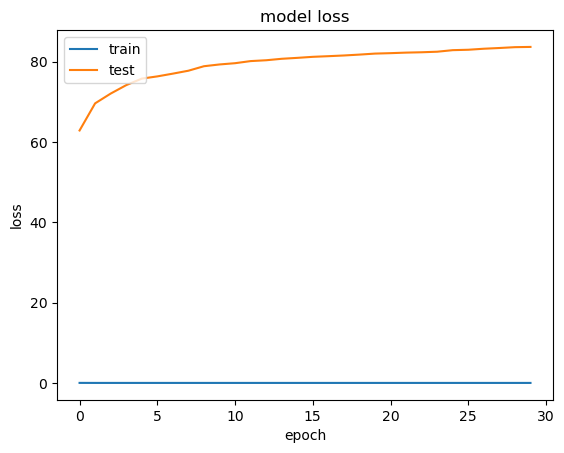

In [120]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- The above results suggest that the sample dataset is not going to work with a simple dense model. This leaves two options: create a conv model or use the set which has the features alread extracted such as peaks and troughs etc. Both can be explored and would make for an interesting write up in the final report/exam.  
- The other reason could well be the imbalance in favour of the normal classes. Test this by removing a section of those 'N' and retesting the model. This would again prove an interesting part of the write up and voyage of discovery for the exam and reflective piece.  
- This can be included as part of the prototype evaluation: it's not so good because of the above which will be tested later down the line.